<a href="https://www.kaggle.com/code/ewha22sy/esaa-yb-week7-2-transcript?scriptVersionId=205050558" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# EDA To Prediction (DieTanic)

## Part1: Exploratory Data Analysis(EDA):

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('/kaggle/input/dietanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The **Age, Cabin and Embarked** have null values. I will try to fix them.

#### How many **Survived**?

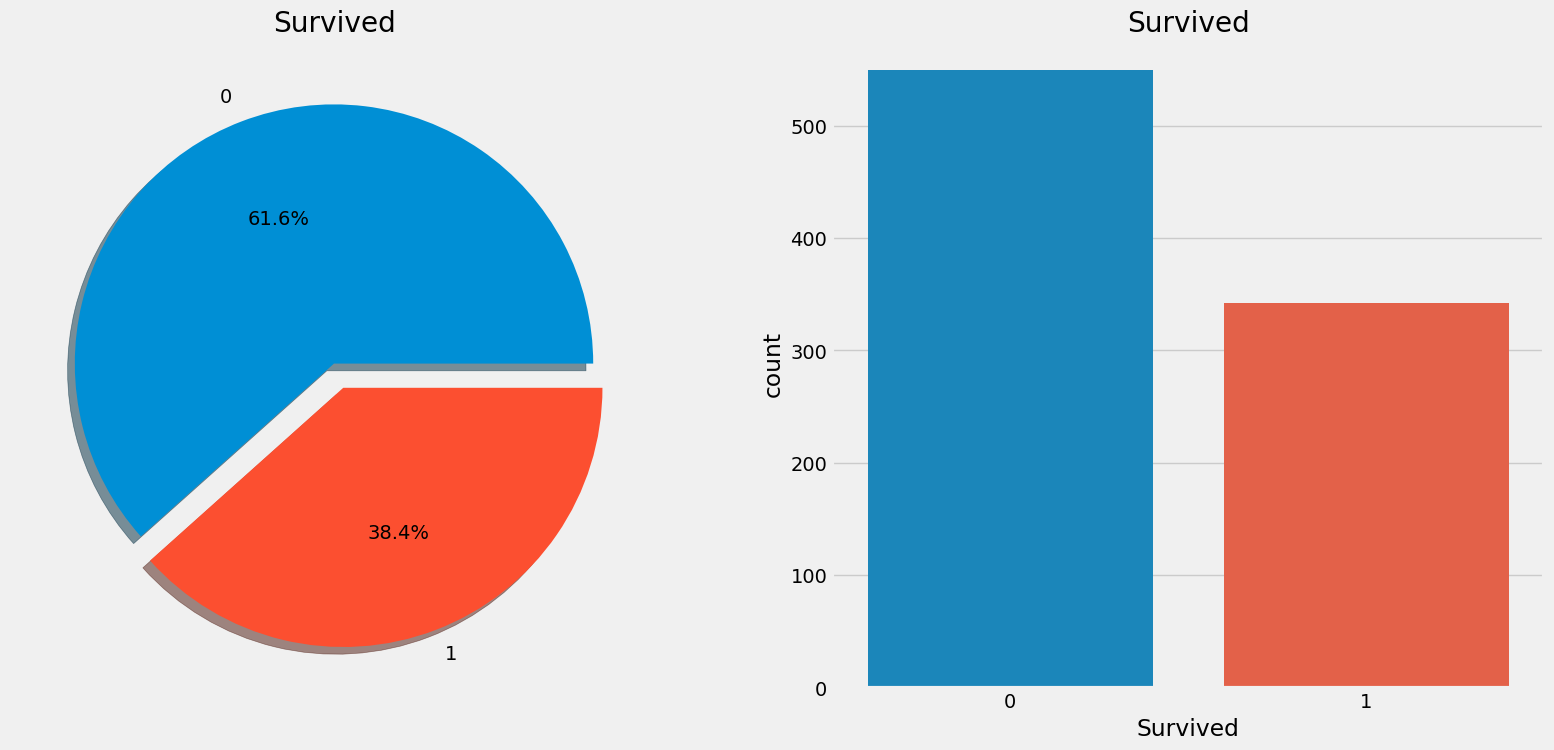

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

많은 사람들이 사고에서 생존하지 못했다는 것이 분명함.
891명의 승객 중 약 350명만이 생존. 이 말은 train set에서는 38.4%만이 생존.

Categorical Features:
- 두 개 이상의 범주를 가지며, 해당 특성의 각 값이 이러한 범주로 분류될 수 있는 변수를 의미

- Categorical Features in the dataset: **Sex, Embarked.**

Ordinal Features:
- 범주형 값과 유사하지만, 이들 사이에 상대적인 순서나 정렬을 할 수 있다는 점에서 차이가 있음.

- Ordinal Features in the dataset: **PClass**

Continuos Features:
- 이론적으로 무한한 수의 값을 가질 수 있음.

- Continous Features in the dataset: **Age**


### 1) Analysis of the features

#### Sex --> Categorical Feature

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

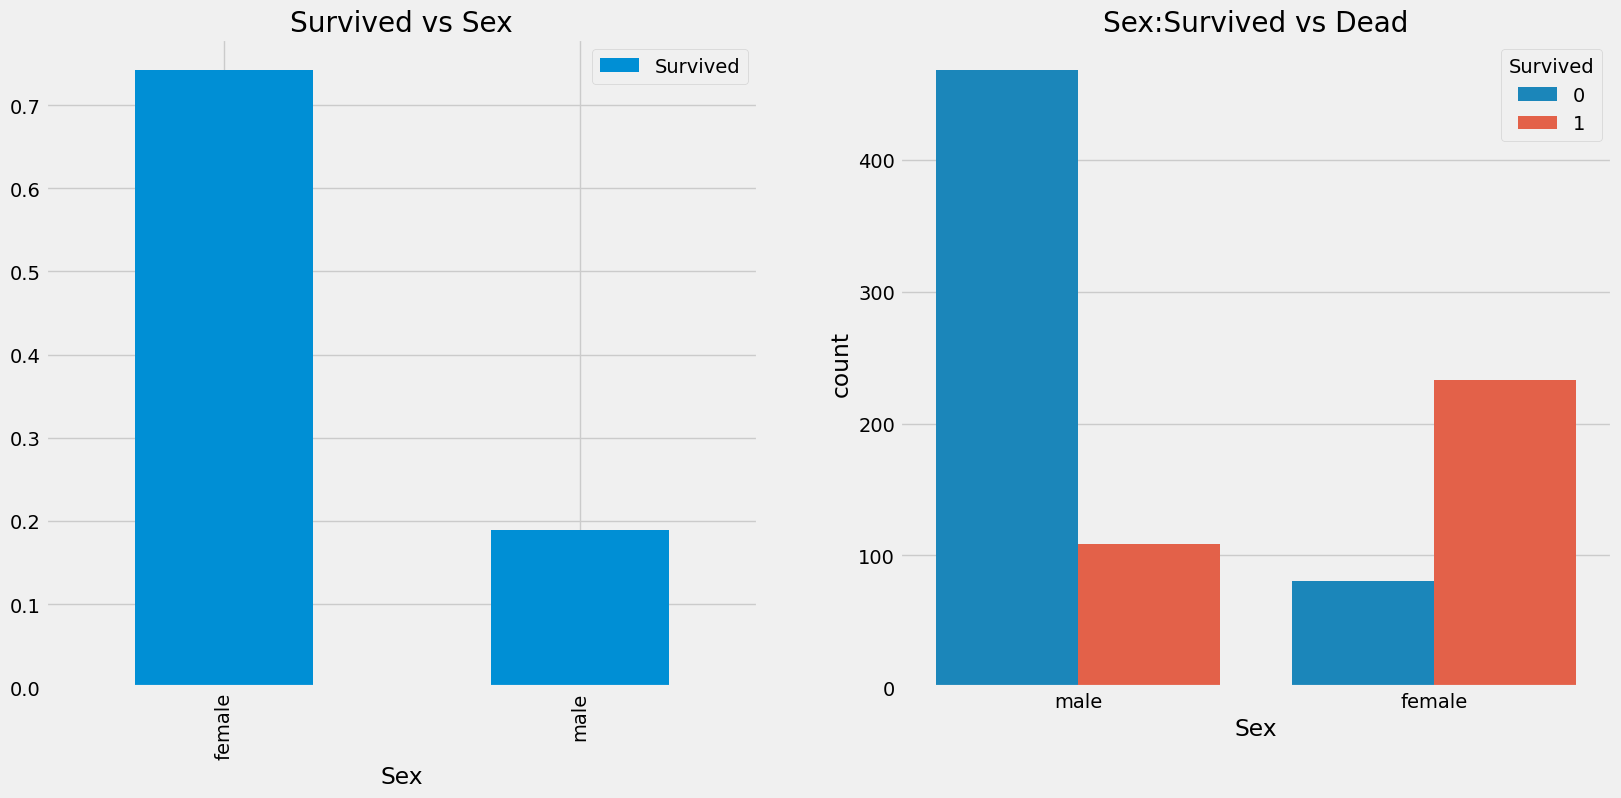

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

배에 있는 남성의 수가 여성의 수보다 훨씬 많음에도 불구하고 생존한 여성의 수는 생존한 남성의 거의 두 배에 이름. 배에 있는 여성의 생존율은 약 75%, 남성의 생존율은 약 18-19%.

#### Pclass --> Ordinal Feature

In [8]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


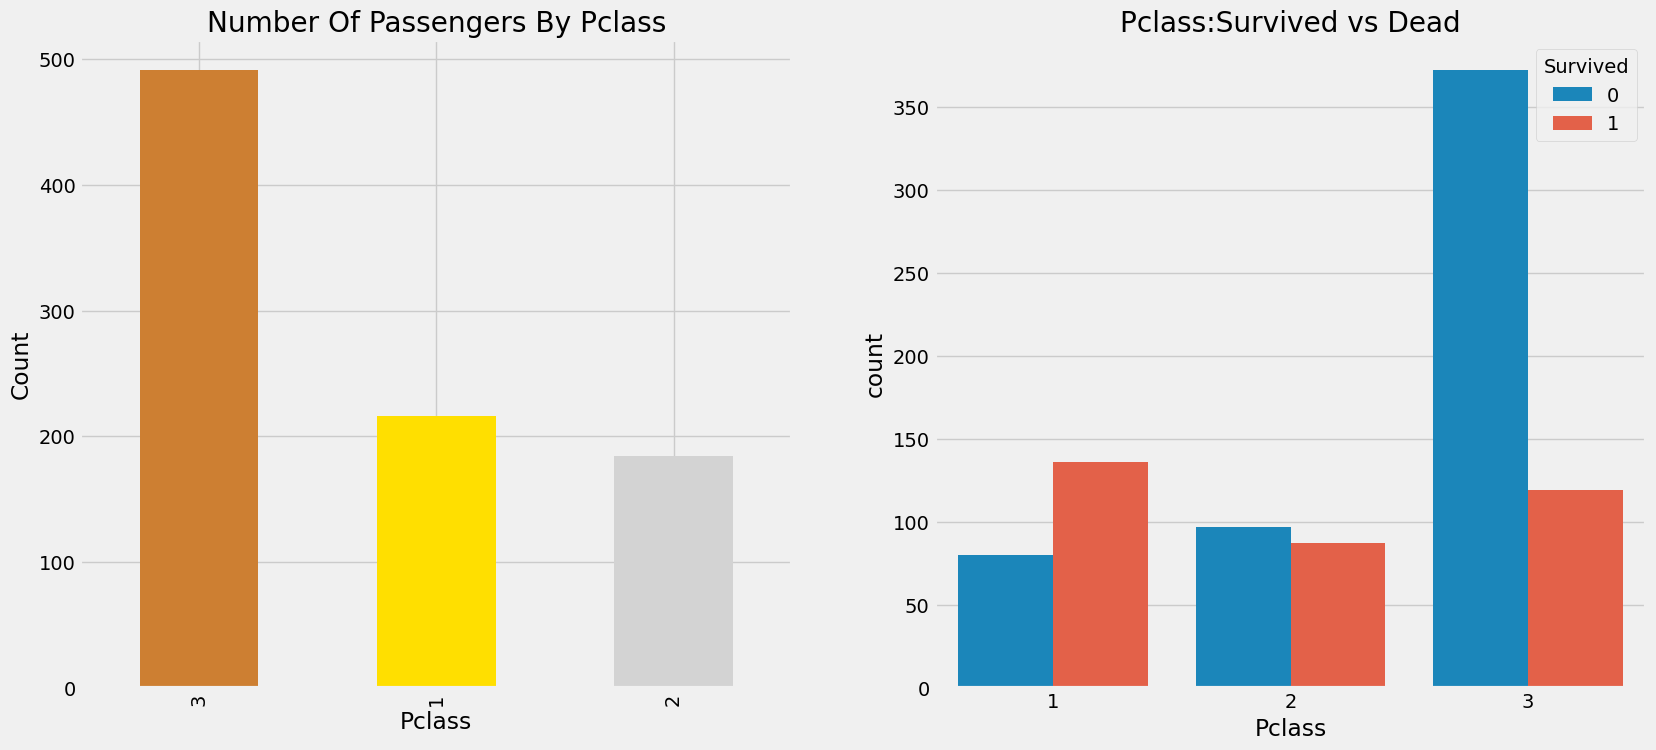

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- Pclass 1의 승객들이 구조에서 매우 높은 우선권을 받음.
- Pclass 3의 승객 수가 훨씬 많지만 이들 중 생존자는 약 25% 정도
- Pclass 1의 생존율은 약 63%, Pclass 2의 생존율은 약 48%.

***돈과 지위는 중요하다는 것을 알 수 있음...***

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

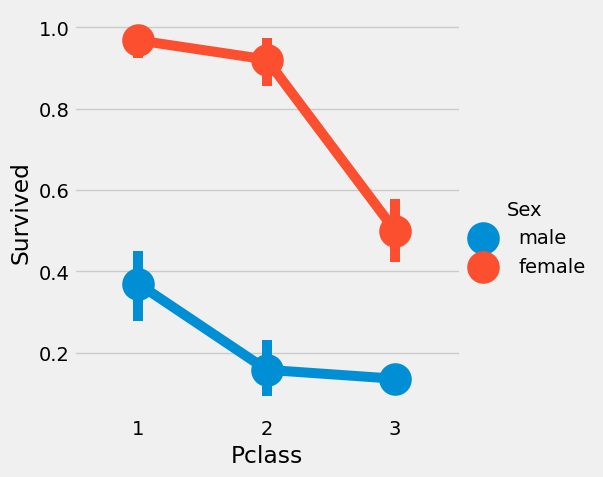

In [11]:
# sns.factorplot('Pclass','Survived',hue='Sex',data=data)
# 현재는 factorplot이 아닌 catplot 사용.
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

범주형 값의 구분을 쉽게 만들어주기 때문에 catplot을 사용함.

Pclass 1의 여성 생존율이 약 95-96%라는 것을 쉽게 추론할 수 있음.
Pclass 1의 여성 중 단 3명이 사망했기 때문임.

Pclass와 상관없이 여성들이 구조에서 우선적으로 대우받았다는 것은 Pclass 1의 남성들조차 생존율이 매우 낮은 것을 보아 분명함.

#### Age --> Continous Feature



In [12]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


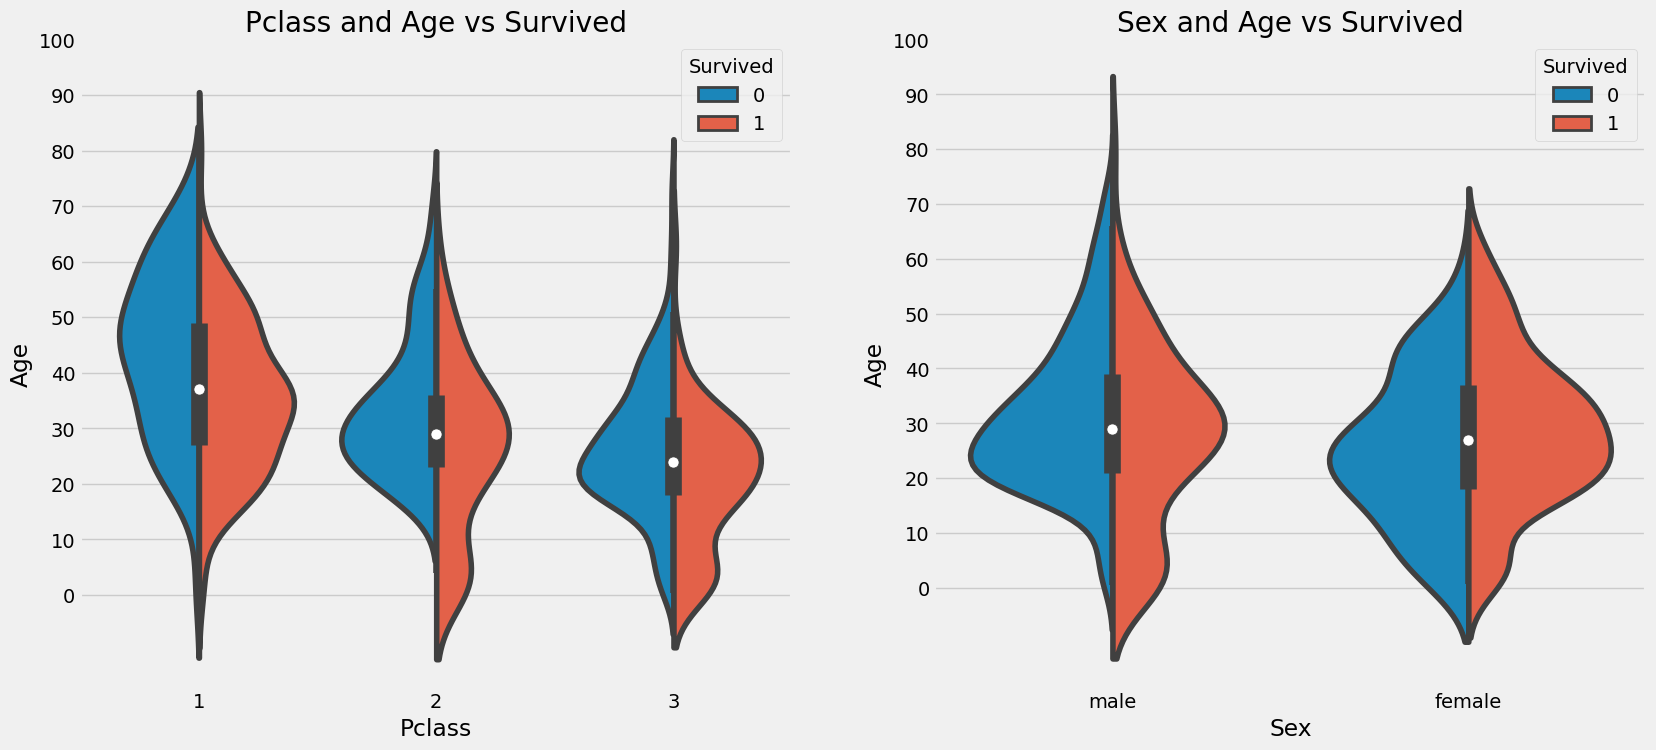

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### Observations:
1. Pclass가 높아질수록 어린이의 수가 증가하며, 10세 이하의 승객(즉, 어린이)의 생존율은 Pclass와 관계없이 좋음.
2. Pclass 1의 20세에서 50세 사이 승객의 생존 가능성은 높고, 특히 여성의 경우 더 좋음
3. 남성의 경우, 나이가 증가함에 따라 생존 가능성이 감소

Age 특성에는 177개의 결측값이 있음.

이 NaN 값을 대체하기 위해 데이터셋의 평균 나이를 할당할 수 있을 것 같았지만
다양한 나이를 가진 사람들이 많았기 때문에 평균 나이가 29세를 아이에게 단순히 그 값을 할당할 수는 없음.

그래서 우리는 이름 특성을 확인해야함. 이름에는 "Mr" 또는 "Mrs"와 같은 호칭이 포함되어 있음.

따라서 각각의 그룹에 대해 Mr과 Mrs의 평균 나이를 할당할 수 있음.

In [14]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

우리는 Regex: [A-Za-z]+) 를 사용하는 중임.
> 대문자 A-Z 또는 소문자 a-z로 이루어진 문자열을 찾고, 그 뒤에 점(.)이 오는 것을 의미

이름에서 이니셜을 성공적으로 추출 가능.

In [15]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle나 Mme와 같은 잘못된 이니셜이 있는데 이것들은 "Miss"를 의미.   
따라서 이를 "Miss"로 대체

In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [18]:
# 나이 결측값 채우기

## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [19]:
data.Age.isnull().any() #So no null values left finally 

False

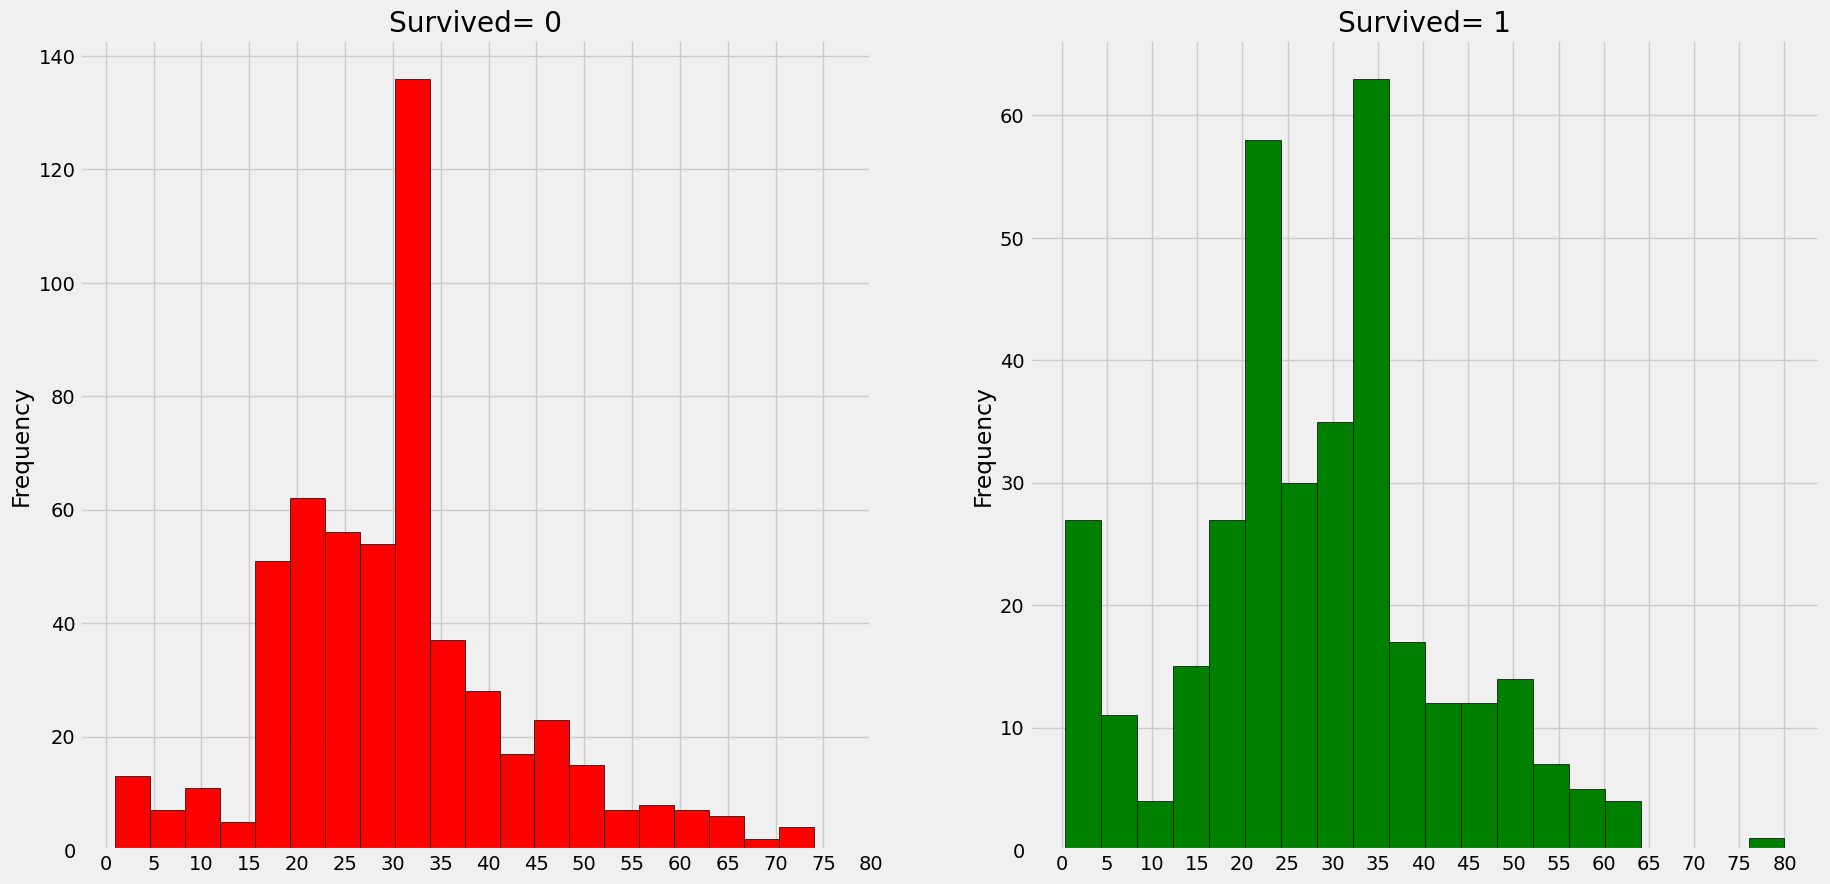

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

알 수 있는 것

1. 5세 미만의 유아들이 제일 많이 구조됨. (여성과 어린이를 우선 구조하는 정책이었음.)

2. 가장 나이가 많은 승객이 구조되었습니다(80세).

3. 사망자의 최대 수는 30세에서 40세 사이의 연령대에서 발생

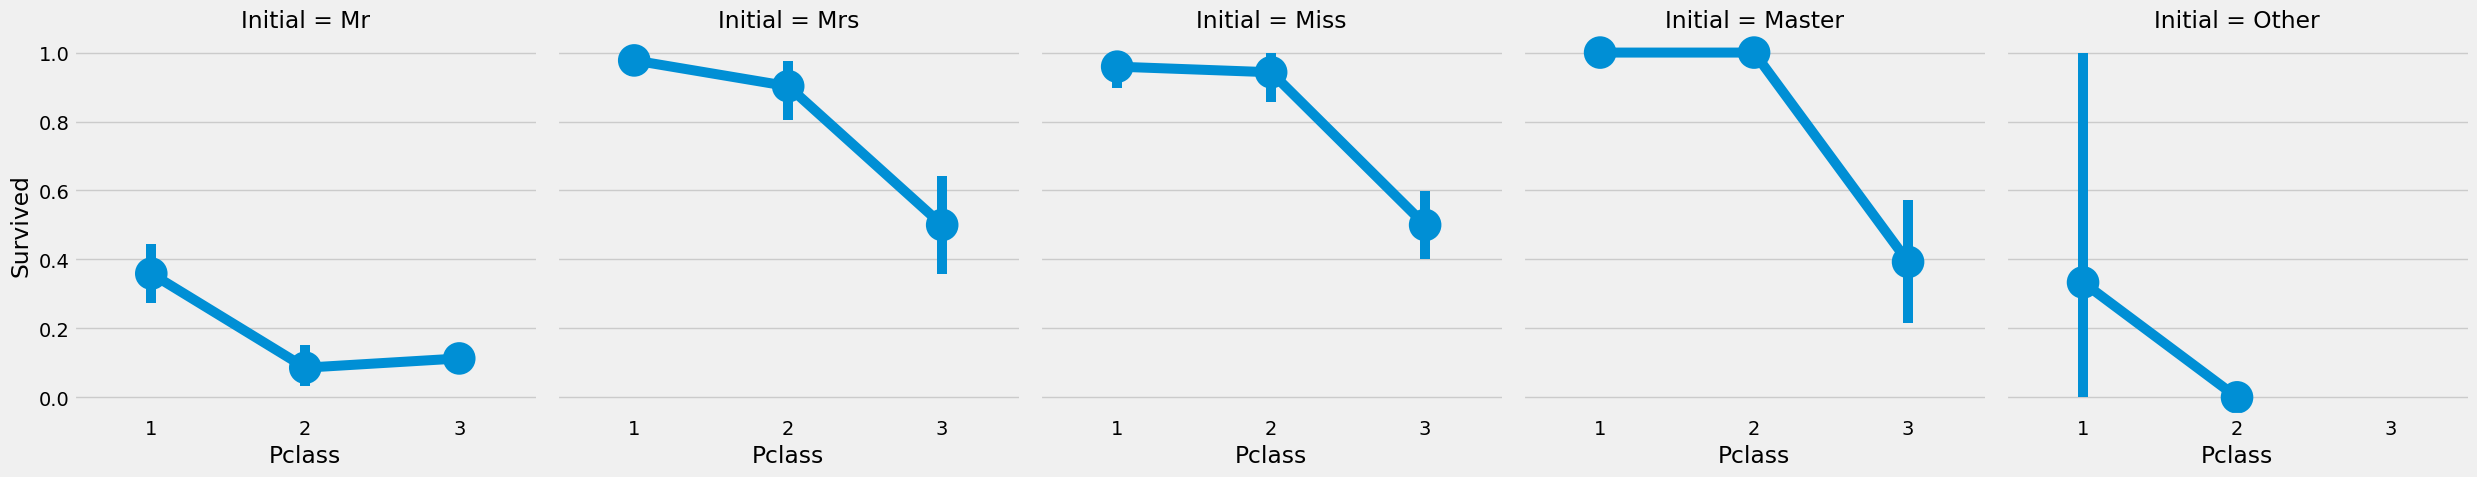

In [21]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data, kind='point')
plt.show()

여성과 어린이를 우선 구조하는 정책은 PClass에 관계없이 그대로 적용됨.

#### Embarked --> Categorical Value

In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

#### Chance for Survival by Port Of Embarkation

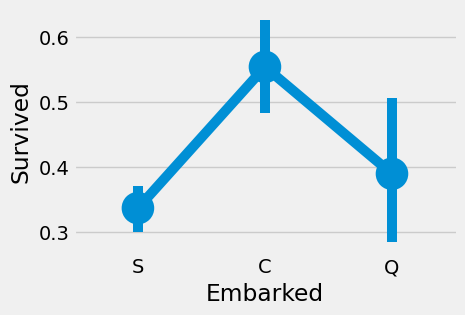

In [23]:
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

포트 C에서의 생존 가능성은 약 0.55로 가장 높고, 반면 포트 S에서의 생존 가능성은 가장 낮다.

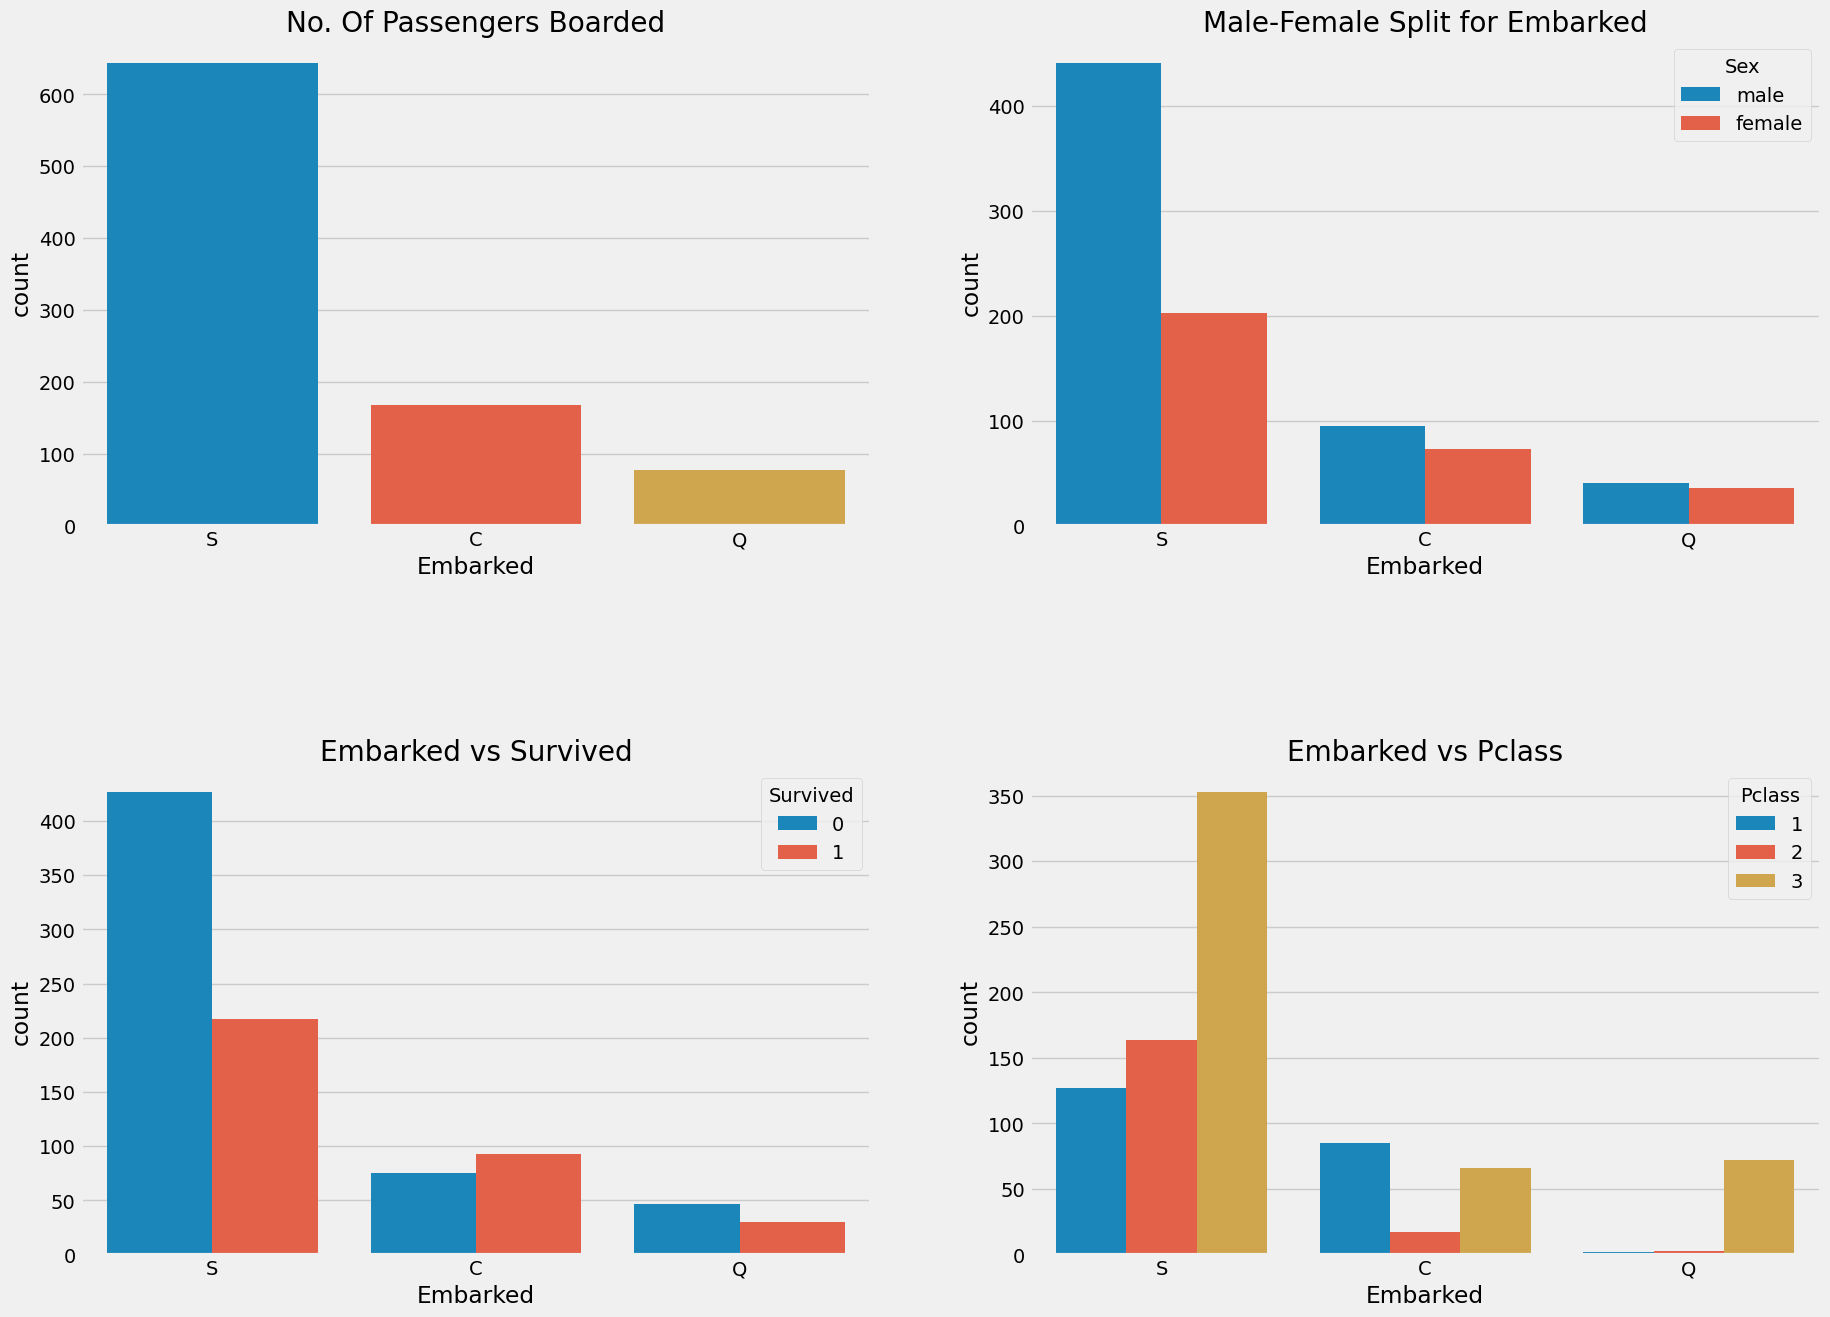

In [24]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

발견점:

1. 대부분의 많은 승객들이 S에서 탑승했으며, 그들 중 대다수는 Pclass 3에 속함.

2. C에서 탑승한 승객들은 운이 좋은 것으로 보이며, 이들 중 상당수가 생존. 그 이유는 Pclass 1과 Pclass 2의 모든 승객이 구조되었기 때문일 수도 있음.

3. S 항구는 대부분의 부유한 사람들이 탑승한 항구로 보임. 하지만 여기서 생존 가능성이 낮은 이유는 Pclass 3 승객 중 약 81%가 생존하지 못했기 때문입니다.

4. Q 항구의 경우 거의 95%의 승객이 Pclass 3에 속했음.

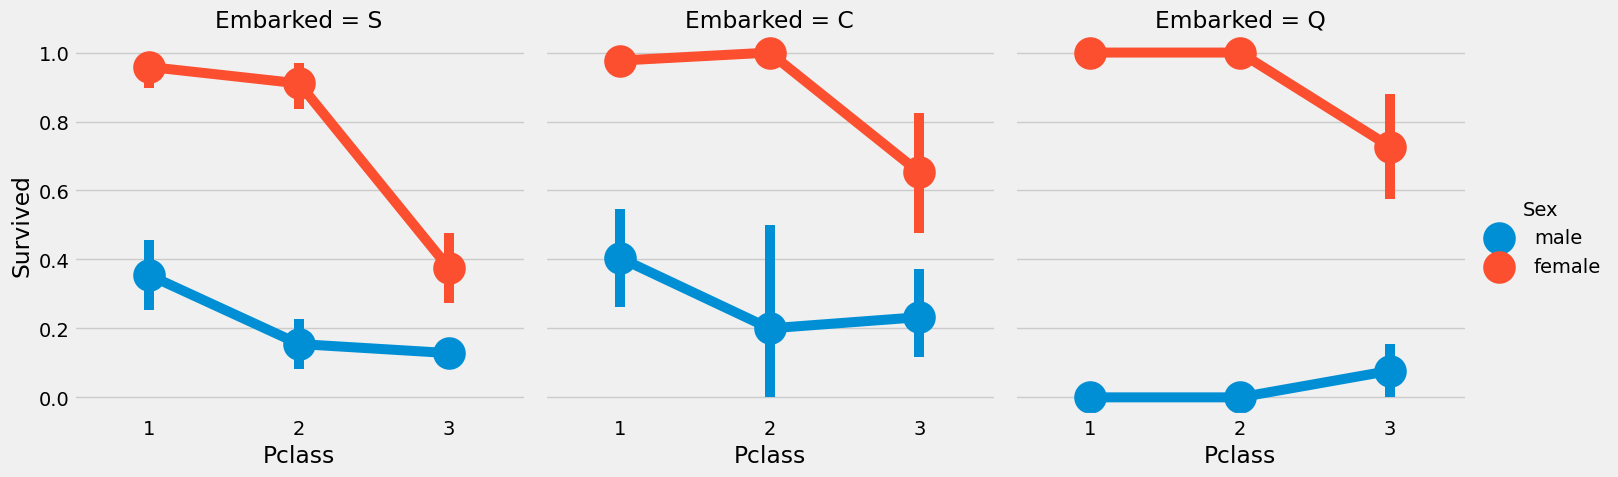

In [25]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data,kind='point')
plt.show()

발견점:

1. Pclass 1과 Pclass 2의 여성 생존 가능성은 Pclass와 관계없이 거의 1에 가까움. 

2. S 항구는 Pclass 3 승객에게 매우 불운한 곳으로 보이며, 남성과 여성 모두의 생존율이 매우 낮습니다. (돈이 중요하다.)

3. Q 항구는 남성에게 가장 불행한 곳. 거의 모든 승객이 Pclass 3에 속했음.

#### Filling Embarked N

최대 승객이 S에서 탔기 떄문에 NaN값을 S로 대체.

In [26]:
data['Embarked'].fillna('S',inplace=True)

In [27]:
# 결측값 확인
data.Embarked.isnull().any()# Finally No NaN values

False

#### SibSip --> Discrete Feature

누군가와 함께였는지, 혼자였는지를 나타내는 특성.

 Sibling = 형제
 Spouse = 남편, 아내

In [28]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


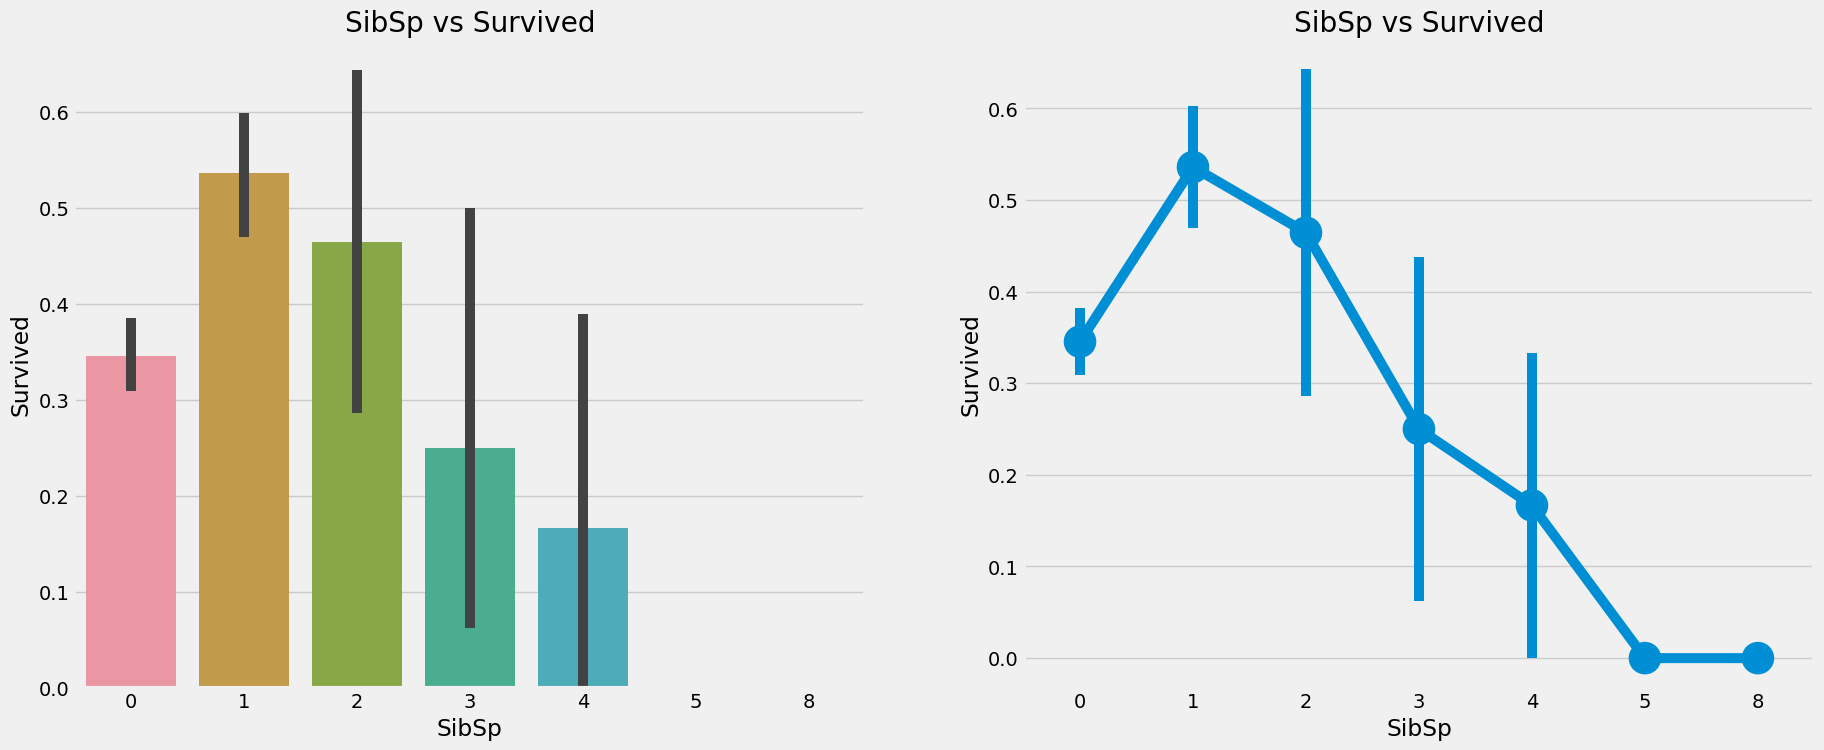

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1])
# 왜 안나올까요...?
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [30]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


발견점:

승객이 형제자매가 없이 혼자 탑승했을 경우 생존율이 34.5%.   
형제자매의 수가 증가할수록 생존율은 대략적으로 감소   
만약 가족이 함께 탑승하고 있다면 자신보다 가족을 먼저 구하려 할 것입니다. 놀랍게도 5-8명의 가족이 있는 경우 생존율은 0%.

교차표를 보면, SibSp가 3을 초과한 사람들은 모두 Pclass 3에 속했음. 따라서 Pclass 3에 속한 대가족(>3)은 모두 사망했음이 분명함.

#### Parch

In [31]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


교차표는 많은 가족 단위의 승객이 Pclass3에 속함을 알 수 있음.

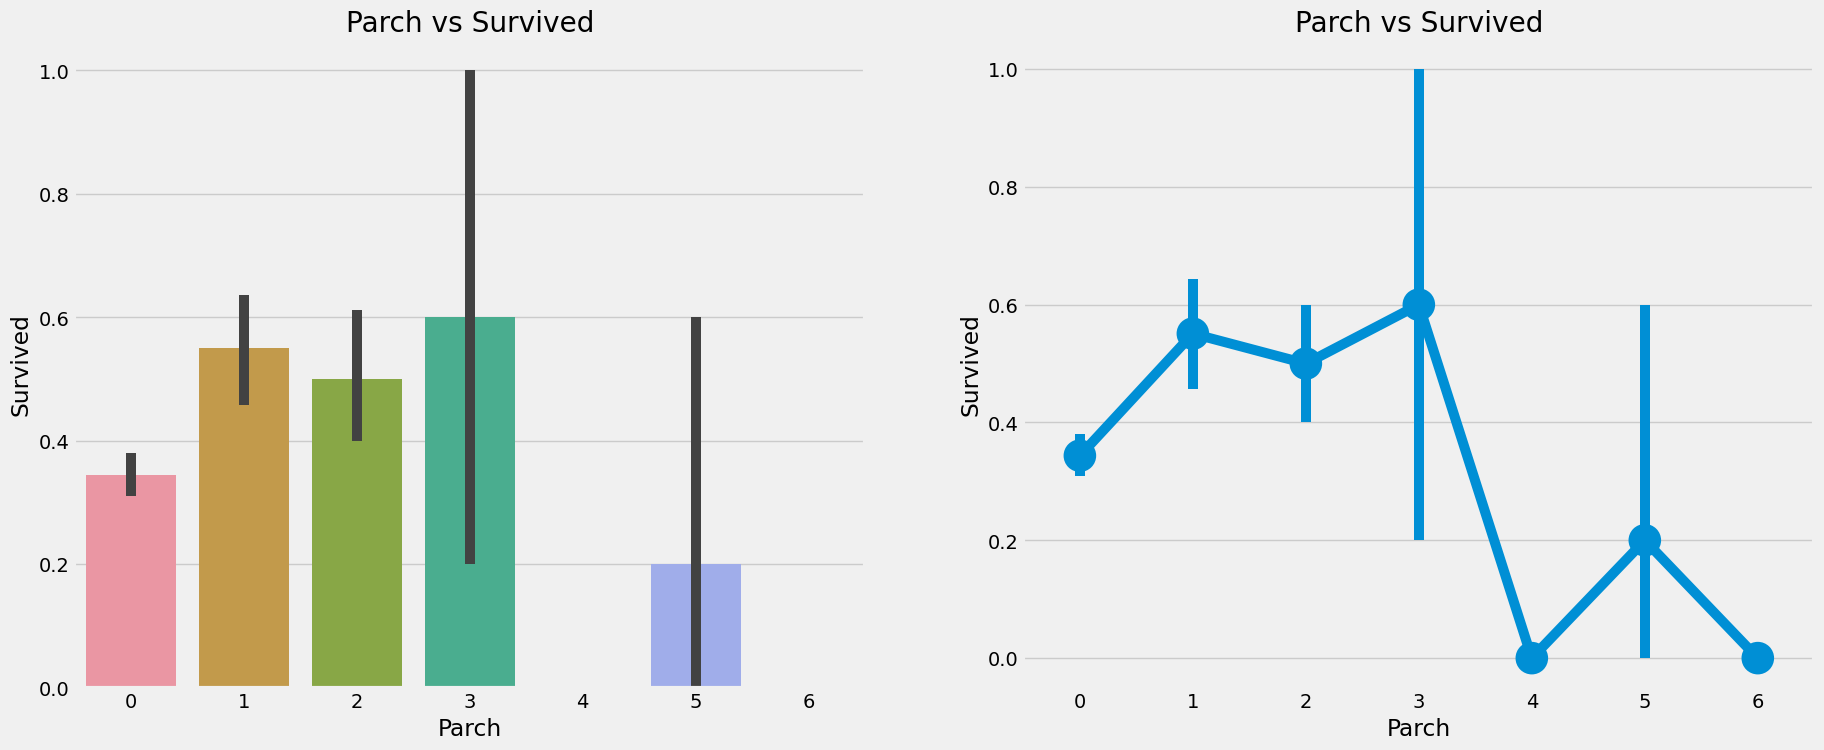

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

관찰점:

1. 부모와 함께 탑승한 승객들은 생존 가능성이 높음.

2. 하지만 부모의 수가 증가하면 생존 가능성은 감소

3. 1-3명의 부모가 탑승한 경우 생존 가능성이 좋음. 반면, 혼자 있는 것도 치명적이며, 4명 이상의 부모가 탑승한 경우 생존 가능성이 감소.

#### Fare --> Continous Feature

In [33]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


가장 작은 요금으로 탄 사람은 0.

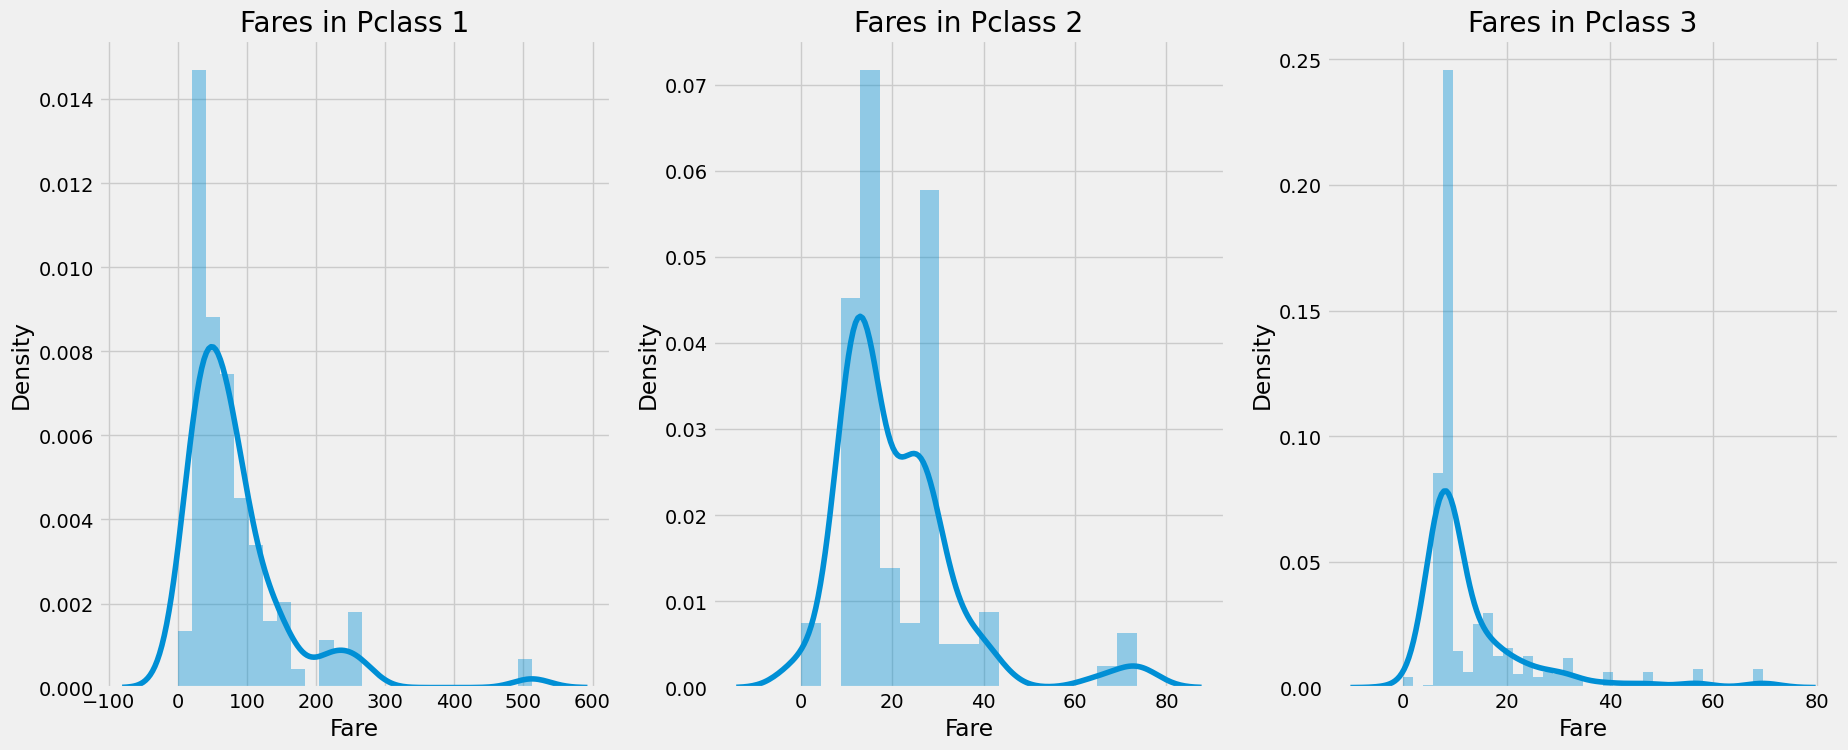

In [34]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass 1의 승객 요금에는 큰 분포가 있는 것으로 보이며, 이 분포는 등급이 낮아질수록 감소.

이 요금은 연속적이므로, 구간(binning)을 사용하여 이 값을 이산형 값으로 변환

### 2) Finding any relations or trends considering multiple features.

모든 특성에 대한 요약 관찰점:

성별(Sex): 여성의 생존 가능성이 남성에 비해 높음.

선실 등급(Pclass): 1등급 승객일수록 생존 가능성이 높다는 뚜렷한 경향이 있음. Pclass 3의 생존율은 매우 낮음. 여성의 경우 Pclass 1에서의 생존 가능성은 거의 1에 가깝고, Pclass 2에서도 생존 가능성이 높다. 돈이 중요!

나이(Age): 5-10세 미만의 어린이는 생존 확률이 큼. 반면, 15세에서 35세 사이의 승객은 많은 사망자가 발생함.

탑승 항구(Embarked): Pclass 1 승객의 대다수가 S에서 탑승했음에도 불구하고 C에서의 생존 가능성이 좋음. Q에서 탑승한 승객은 모두 Pclass 3에 속했음.

가족 관계(Parch + SibSp): 1-2명의 형제자매나 배우자, 또는 1-3명의 부모가 탑승할 경우 생존 가능성이 높으며, 혼자이거나 대가족과 함께 여행하는 것보다 생존확률이 더 높음.

#### Correlation Between The Features

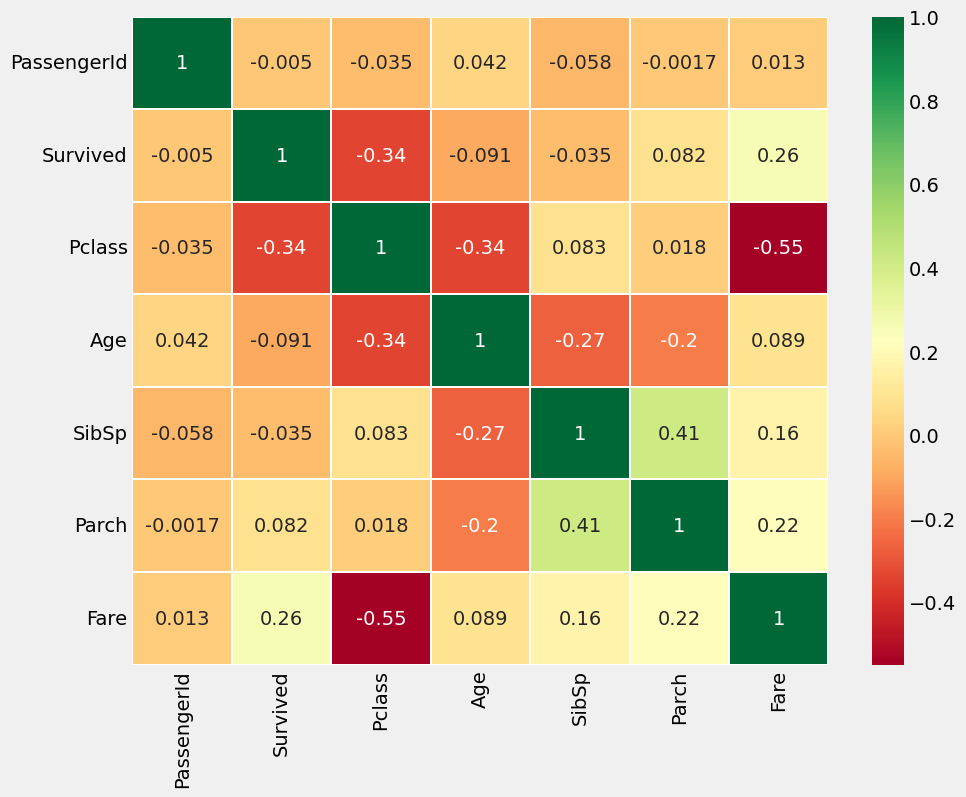

In [35]:
# 문자형 및 이것저것 삭제
data_copy = data.copy()
data_copy = data.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Initial'])
sns.heatmap(data_copy.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## Part2: Feature Engineering and Data Cleaning

Feature Engineering이란?

주어진 데이터셋에 여러 특징(Feature)이 있을 때, 모든 특징이 중요하다고는 할 수 없음. 중복되는 특징이 많을 수 있으며, 이들은 제거해야 함. 또한 다른 특징에서 정보를 관찰하거나 추출하여 새로운 특징을 생성하거나 추가할 수도 있음.

### 1) Adding any few features.

#### Age_band

나이를 구간화 할 것임.
0 - 80세의 나이를 5개의 구간으로 나눌 것.

In [36]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [37]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


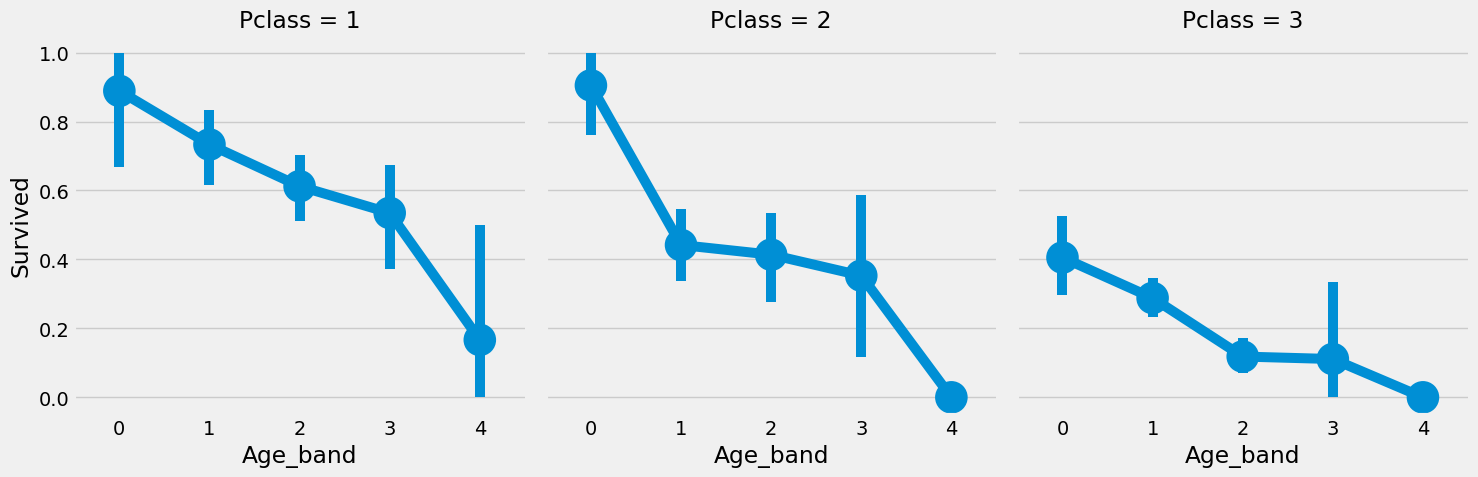

In [38]:
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass', kind='point')
plt.show()

Pclass와 상관 없이 나이가 증가할 수록 생존율이 줄어듬을 알 수 있음.

#### Family_Size and Alone

Family_size와 Alone이라는 feature를 새로 생성.
이는 Parch와 SibSp의 합계.

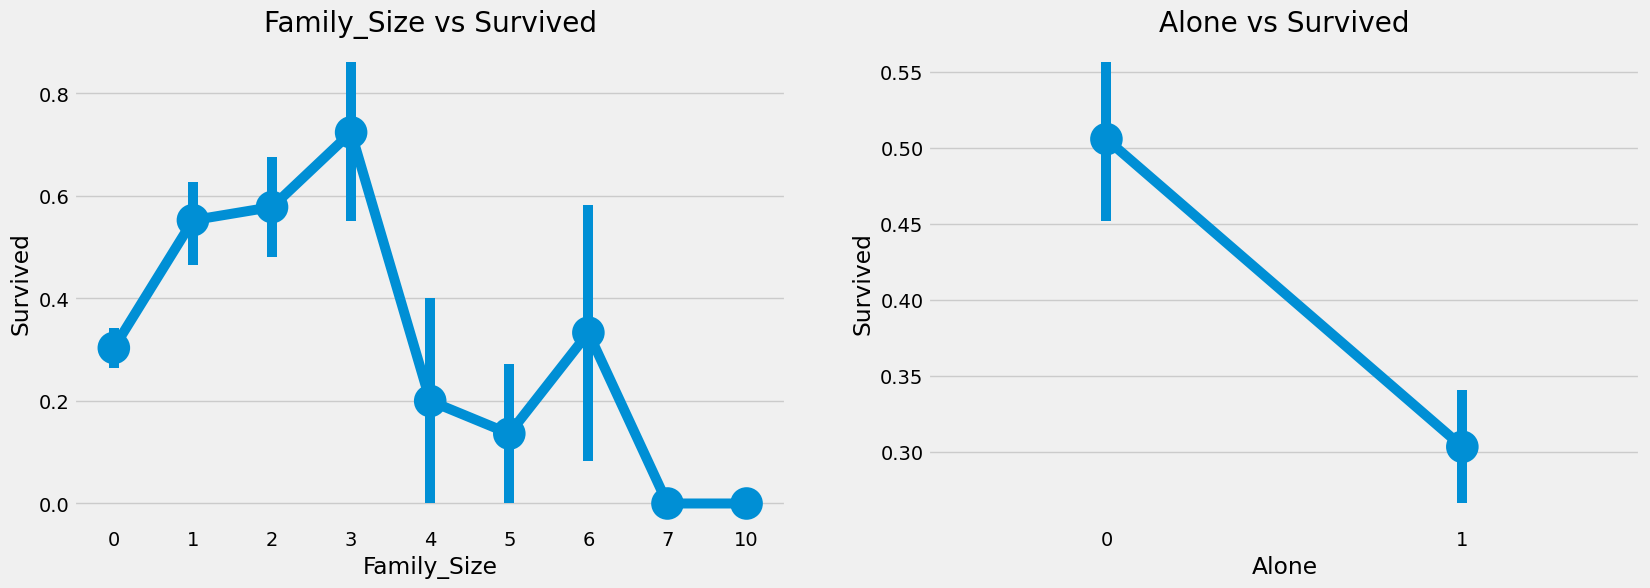

In [39]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='Family_Size',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

혼자이거나 가족단위가 4명 이상일 경우 생존율은 확 떨어짐.

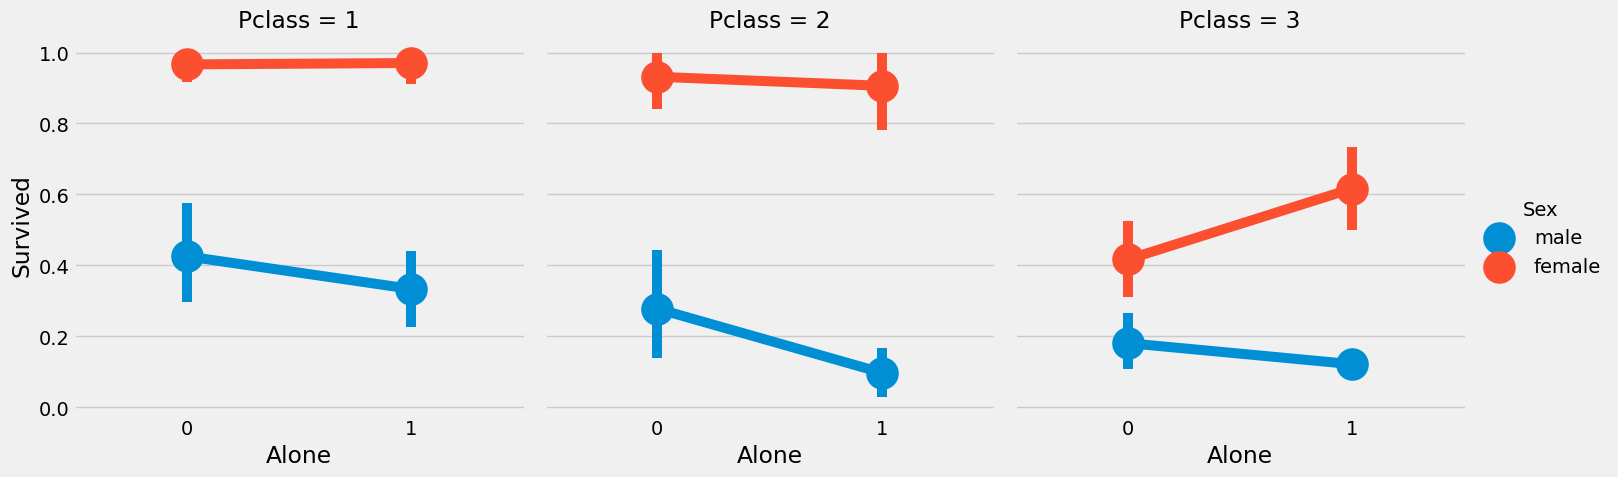

In [40]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex', col='Pclass', kind='point')
plt.show()

혼자 있는 것이 성별이나 선실 등급(Pclass)과 관계없이 해로운 것이 분명하지만, Pclass 3에서는 혼자인 여성의 생존 가능성이 가족과 함께 있는 여성보다 높음.

#### Fare_Range

요금도 연속형 변수이기 때문에 qcut 함수를 활용해서 구간을 나눠줄 것임.

In [41]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [42]:
# 구간을 그대로 쓸 수는 없기 떄문에 변환.
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

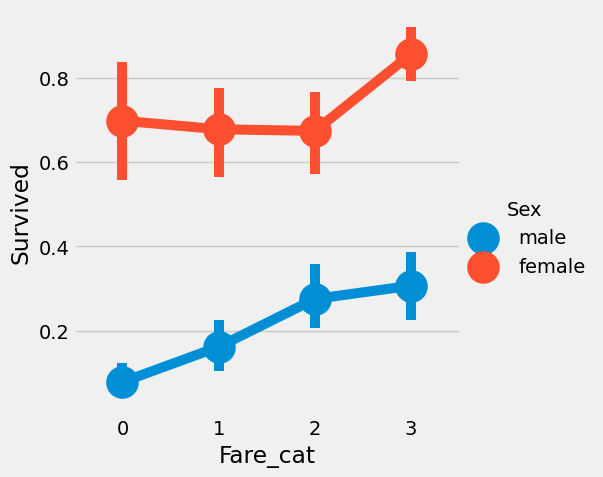

In [43]:
sns.catplot(x='Fare_cat',y='Survived',data=data,hue='Sex', kind='point')
plt.show()

요금에 따라 생존율이 증가할 가능성 있음.

### 2) Removing redundant features.

### 3) Converting features into suitable from for modeling.

문자열을 머신러닝 모델에 전달할 수 없기 때문에, 성별(Sex), 탑승 항구(Embarked) 등의 특성을 숫자 값으로 변환해야 함.

In [44]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

필요없는 데이터 드랍시키기   

**Name**--> We don't need name feature as it cannot be converted into any categorical value.

**Age**--> We have the Age_band feature, so no need of this.

**Ticket**--> It is any random string that cannot be categorised.

**Fare**--> We have the Fare_cat feature, so unneeded

**Cabin**--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

**Fare_Range**--> We have the fare_cat feature.

**PassengerId**--> Cannot be categorised.

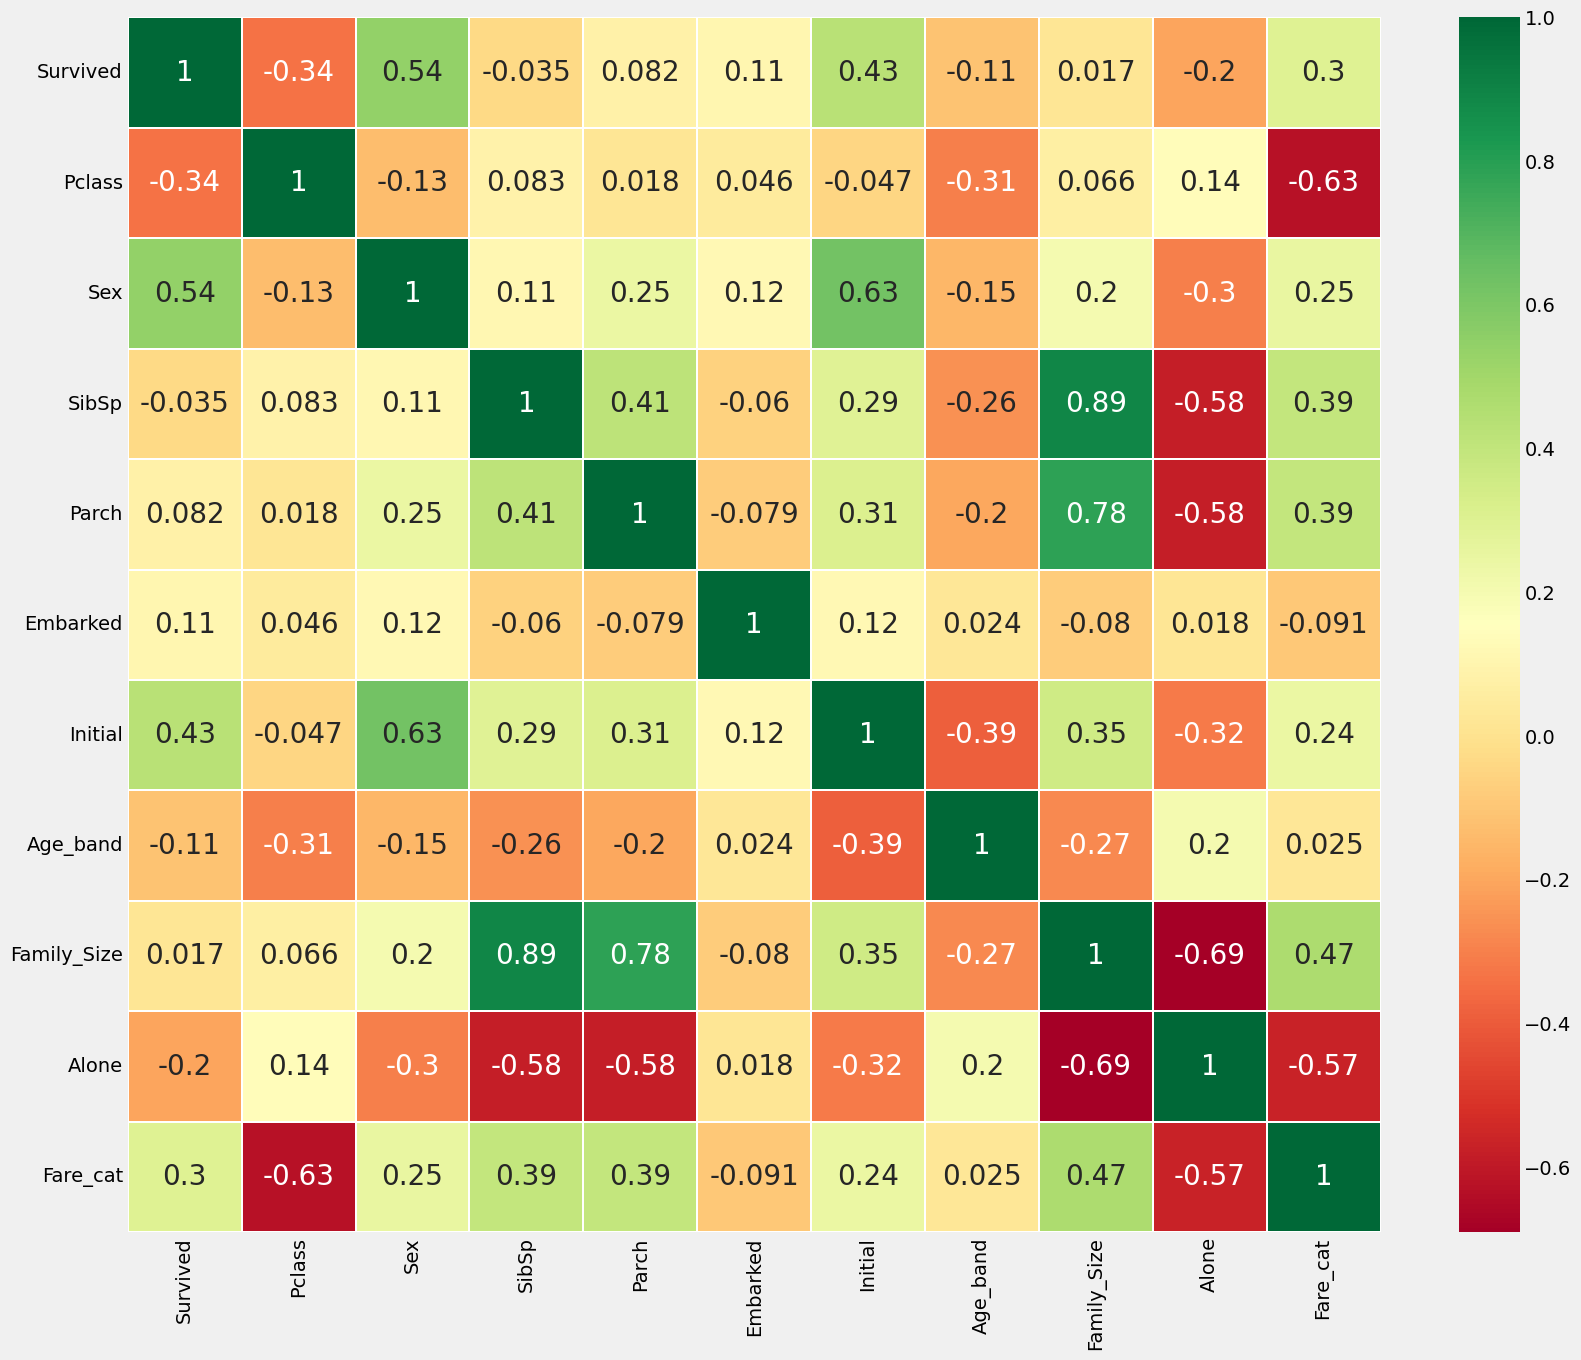

In [45]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Part3: Predictive Modeling

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [46]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [47]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### 1) Running Basic Algorithms.

#### Radial Support Vector Machines(rbf-SVM)

In [48]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


#### Linear Support Vector Machine(linear-SVM)

In [49]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


#### Logistic Regression

In [50]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


#### Decision Tree

In [51]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


#### K-Nearest Neighbours(KNN)

KNN 모형의 경우 n_neighbours에 따라 정확도가 달라짐. n)neighbours 값 바꿔보기.

In [52]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


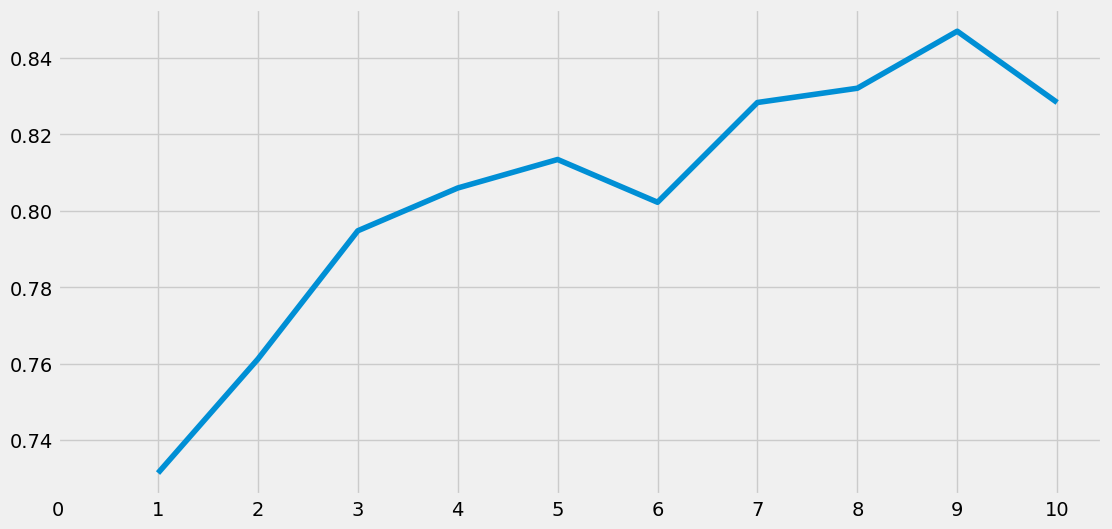

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as 0.8470149253731343


In [53]:
a_index = list(range(1, 11))
a = pd.Series()  
x = list(range(11))

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    accuracy = metrics.accuracy_score(test_Y, prediction)
    a = pd.concat([a, pd.Series([accuracy])], ignore_index=True)  # concat으로 시리즈 추가

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

print('Accuracies for different values of n are:', a.values, 'with the max value as', a.values.max())


#### Gaussian Naive Bayes

In [54]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


#### Random Forests

In [55]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8134328358208955


### 2) Cross Validation.

In [56]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10,shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.806991,0.043863
Naive Bayes,0.795843,0.054861
Random Forest,0.812609,0.043324


<Axes: >

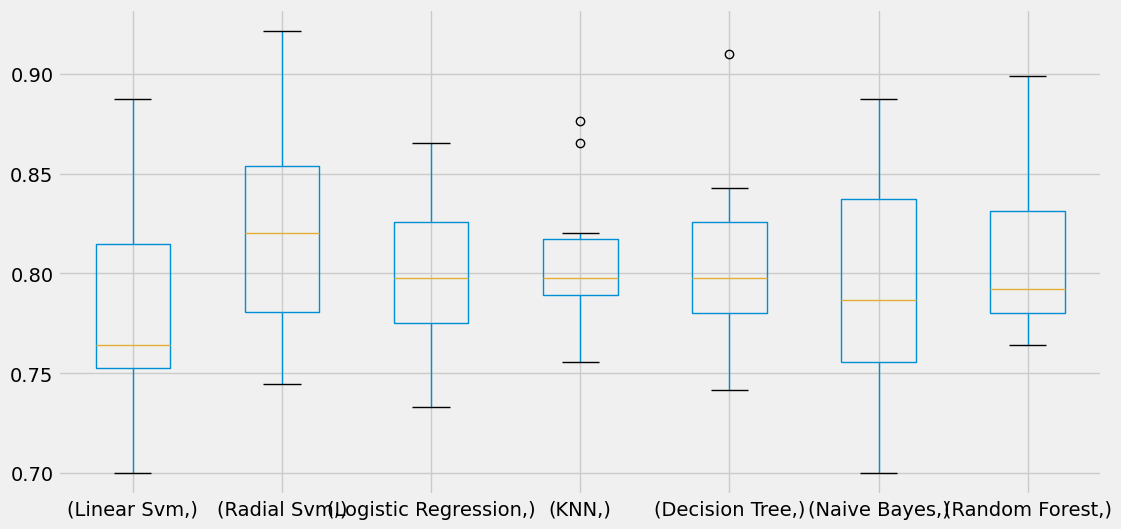

In [57]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

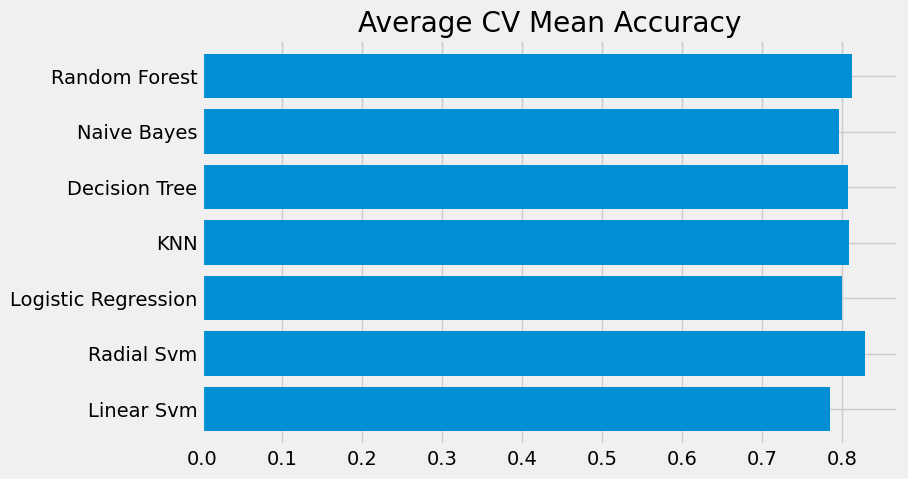

In [58]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

#### Confusion Matrix

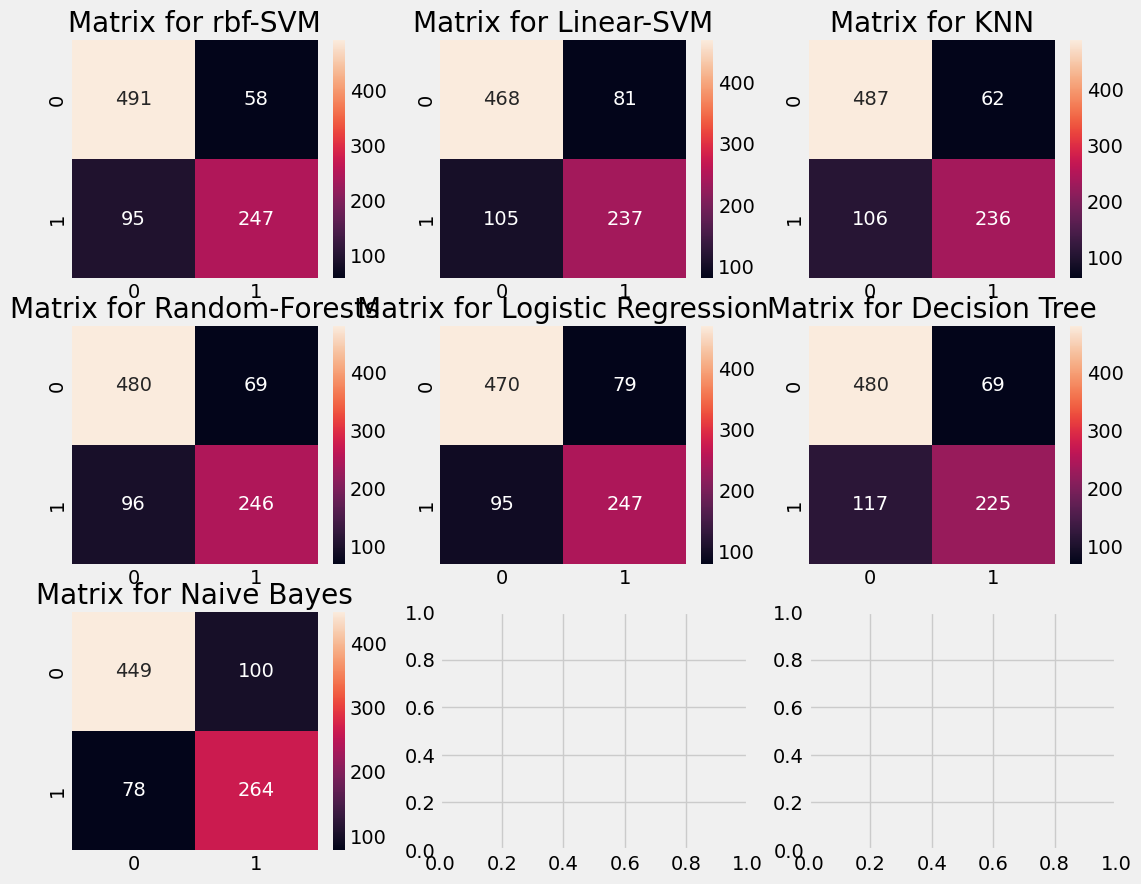

In [59]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

#### Confusion Maxtrix 해석

rbf-SVM은 사망한 승객을 올바르게 예측할 확률이 더 높지만, 나이브 베이즈는 생존한 승객을 올바르게 예측할 확률이 더 높다고 말할 수 있음.

#### Hyper-Parameters Tuning

In [60]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


#### Random Forests

In [61]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


Best Estimator 평가

Rbf-Sv은 C=0.05 and gamma=0.1으로 만들어진 모델이 정확도 82.82%   
Random Forest는 n_estimators=900으로 만들어진 81.8% 모델

### 3) Ensembling.

#### Voting Classifier


In [62]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8237952559300874


#### Bagging



In [63]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


### Bagged Decision Tree


In [64]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


#### Boosting

#### AdaBoost(Adaptive Boosting)

In [65]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [67]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


#### Hyper-Parameter Tuning for AdaBoost

In [68]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


#### Confusion Matrix for the Best Model

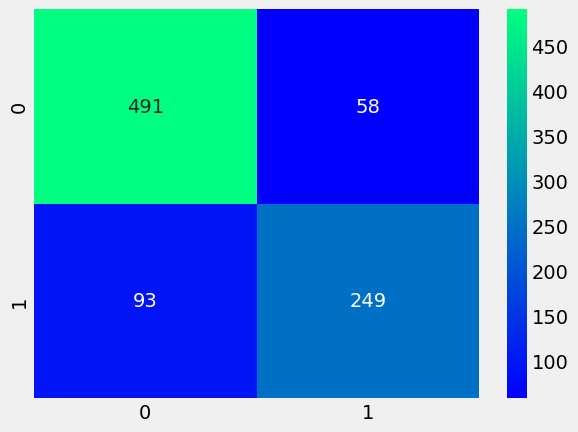

In [69]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

#### Feature Importance

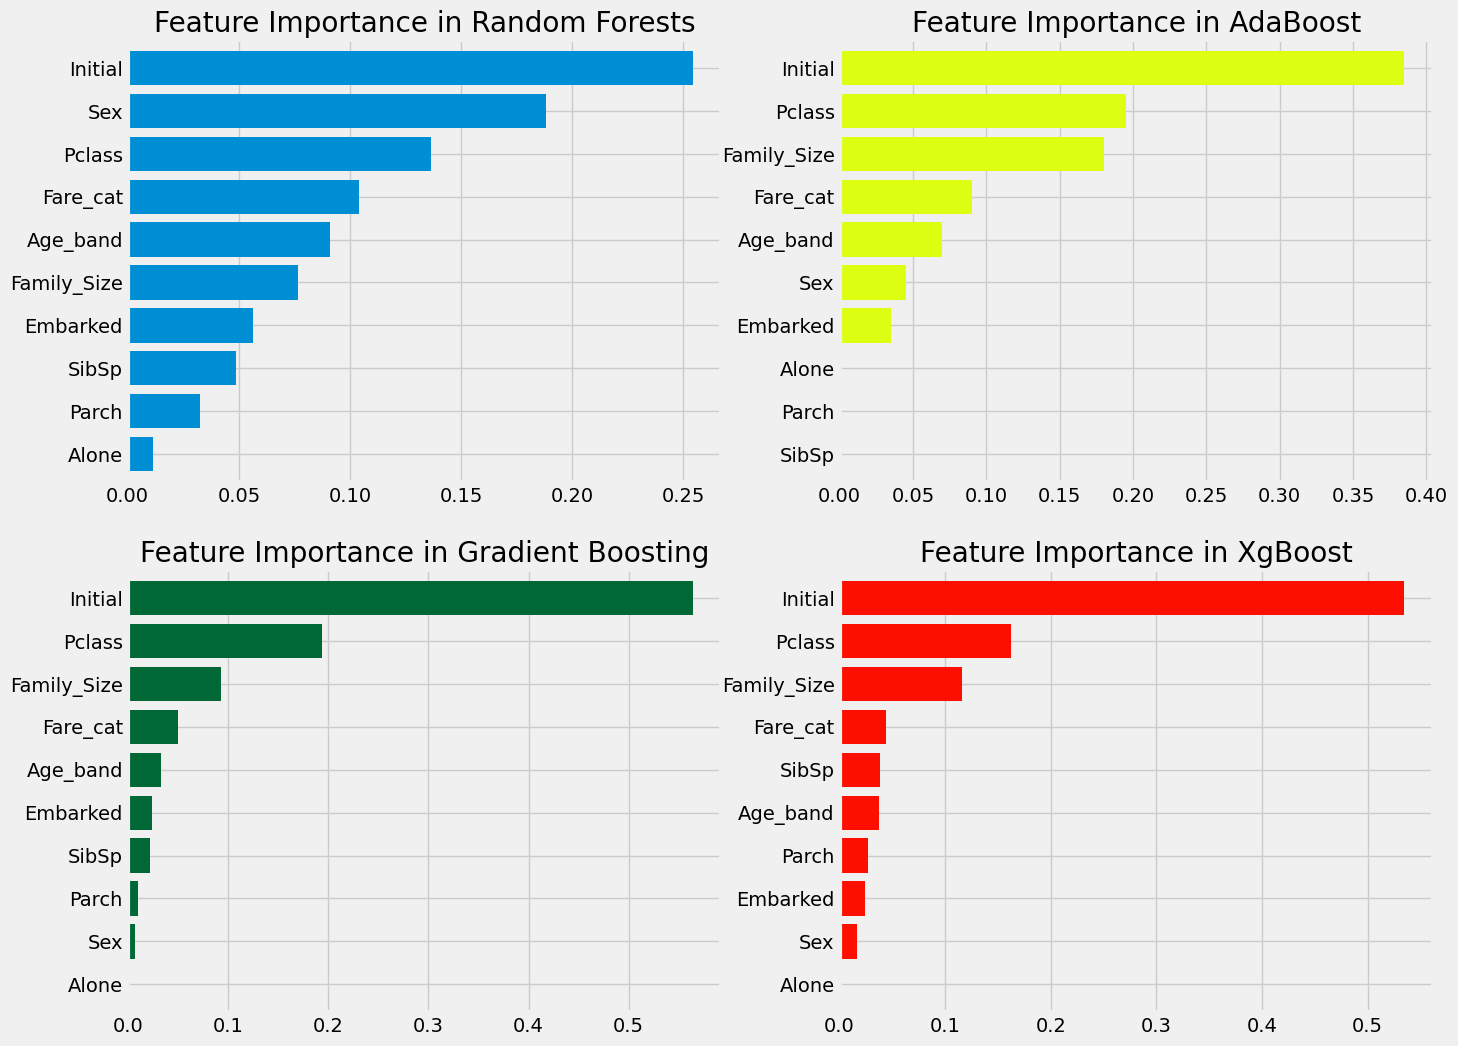

In [70]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

### 4) Important Features Extraction.